Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,060 (402.58 KB)

 Trainable params: 103,060 (402.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7341 - loss: 1.0928 - val_accuracy: 0.9032 - val_loss: 0.3587
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9001 - loss: 0.3550 - val_accuracy: 0.9162 - val_loss: 0.3008
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9160 - loss: 0.2980 - val_accuracy: 0.9250 - val_loss: 0.2668
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9259 - loss: 0.2673 - val_accuracy: 0.9345 - val_loss: 0.2446
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9302 - loss: 0.2473 - val_accuracy: 0.9378 - val_loss: 0.2283
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9367 - loss: 0.2273 - val_accuracy: 0.9421 - val_loss: 0.2107
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9411 - loss: 0.2112 - val_accuracy: 0.9439 - val_loss: 0.1998
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9453 - loss: 0.1977 - 

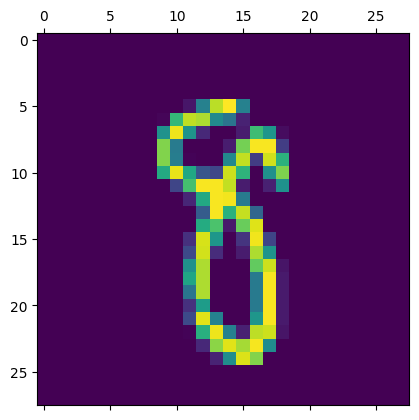

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
Handwritten number is = 8


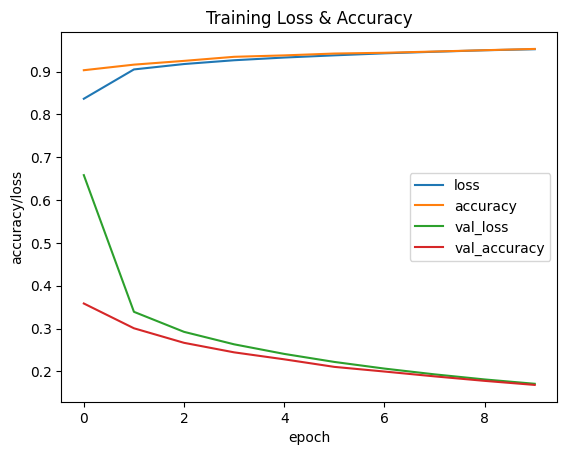

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
# Load the training and testing data MNIST
# Import dataset & split into train and test data
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
# Length of the training dataset
len(x_train)
len(y_train)
# Length of the testing dataset
len(x_test)
len(y_test)
# Shape of the training dataset
x_train.shape
# Shape of the testing dataset
x_test.shape
# See first Image Matrix
x_train[0]
# See first image
plt.matshow(x_train[0])
# Normalize the iamges by scaling pixel intensities to the range 0,1
x_train=x_train/255
x_test=x_test/255
# See first Naormalize Image Matrix
x_train[0]
# Define the network architecture using Keras
model=keras.Sequential([
# Input Layer
keras.layers.Flatten(input_shape = (28,28)),
# Hidden Layer
keras.layers.Dense(128,activation ='relu'),
# Output Layer
keras.layers.Dense(10,activation = 'softmax')
# keras.layers.Dense(20,activation = 'softmax')
])
model.summary()
# Compile the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#Train the model using SGD
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)
#Evaluate the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)
# Making Prediction on New Data
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
print("Handwritten number is = %d" %np.argmax(predicted_value[n]))
# Plot the training loss and accuracy
history.history.keys()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss & Accuracy')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.show()